In [1]:
import pandas as pd
import numpy as np


pd.set_option("display.max_columns", None)
pd.options.display.max_columns = None

In [2]:
df=pd.read_csv('../WorkingData/moneydiaries_nocomments.csv')
#df['diaryurl'].to_csv('urls.csv', index=False )

In [3]:
df.shape

(1494, 2)

In [4]:
df.diaryurl.sample(10)

1048    /en-us/unemployed-pacific-crest-trail-salary-m...
1087    /en-us/marketing-specialist-seattle-wa-salary-...
1050    /en-us/actor-teacher-new-brunswick-nj-salary-m...
1024    /en-us/money-diary-shanghai-china-copywriter-s...
843     /en-us/money-diary-suburb-west-of-boston-ma-we...
1305      /en-us/money-diary-st-paul-minnesota-disability
1467    /en-us/epidemiologist-copenhagen-denmark-salar...
483     /en-us/fashion-pr-manager-new-york-ny-salary-m...
1490    /en-us/production-television-los-angeles-salar...
541     /en-us/portland-or-account-manager-salary-mone...
Name: diaryurl, dtype: object

## PART 1: Clean and generate variables for location, salary, occupation etc.

In [5]:
df['desc'] = df.diaryurl.str.replace("/en-us/", "") \
    .str.replace("-", " ") \
    .str.replace("money diary", "") \
    .str.replace("money diaries", "") \
    .str.replace("salary", "") \
    .str.replace("budget", "") \
    .str.replace("tuition", "")
df['location'] = np.nan
df
df.head()

,diaryurl,diarycontent,desc,location
0,/en-us/student-texas-tuition-money-diary,"[""Welcome to Money Diaries — College Edition w...",student texas,NaN
1,/en-us/money-diary-san-francisco-project-manag...,"[""Welcome to Money Diaries, where we're tackli...",san francisco project manager,NaN
2,/en-us/phd-student-new-york-ny-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",phd student new york ny,NaN
3,/en-us/paralegal-bergen-county-nj-salary-money...,"[""Welcome to Money Diaries, where we're tackli...",paralegal bergen county nj,NaN
4,/en-us/marketing-manager-orange-county-money-d...,"[""Welcome to Money Diaries, where we're tackli...",marketing manager orange county,NaN


In [6]:
state_abbrs = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
state_abbrs = [name.lower() for name in state_abbrs]

state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
print(len(state_names))
state_names = [name.lower() for name in state_names]

city_names = ["Aberdeen", "Abilene", "Akron", "Albany", "Albuquerque", "Alexandria", "Allentown", "Amarillo", "Anaheim", "Anchorage", "Ann Arbor", "Antioch", "Apple Valley", "Appleton", "Arlington", "Arvada", "Asheville", "Athens", "Atlanta", "Atlantic City", "Augusta", "Aurora", "Austin", "Bakersfield", "Baltimore", "Barnstable", "Baton Rouge", "Beaumont", "Bel Air", "Bellevue", "Berkeley", "Bethlehem", "Billings", "Birmingham", "Bloomington", "Boise", "Boise City", "Bonita Springs", "Boston", "Boulder", "Bradenton", "Bremerton", "Bridgeport", "Brighton", "Brownsville", "Bryan", "Buffalo", "Burbank", "Burlington", "Cambridge", "Canton", "Cape Coral", "Carrollton", "Cary", "Cathedral City", "Cedar Rapids", "Champaign", "Chandler", "Charleston", "Charlotte", "Chattanooga", "Chesapeake", "Chicago", "Chula Vista", "Cincinnati", "Clarke County", "Clarksville", "Clearwater", "Cleveland", "College Station", "Colorado Springs", "Columbia", "Columbus", "Concord", "Coral Springs", "Corona", "Corpus Christi", "Costa Mesa", "Dallas", "Daly City", "Danbury", "Davenport", "Davidson County", "Dayton", "Daytona Beach", "Deltona", "Denton", "Denver", "Des Moines", "Detroit", "Downey", "Duluth", "Durham", "El Monte", "El Paso", "Elizabeth", "Elk Grove", "Elkhart", "Erie", "Escondido", "Eugene", "Evansville", "Fairfield", "Fargo", "Fayetteville", "Fitchburg", "Flint", "Fontana", "Fort Collins", "Fort Lauderdale", "Fort Smith", "Fort Walton Beach", "Fort Wayne", "Fort Worth", "Frederick", "Fremont", "Fresno", "Fullerton", "Gainesville", "Garden Grove", "Garland", "Gastonia", "Gilbert", "Glendale", "Grand Prairie", "Grand Rapids", "Grayslake", "Green Bay", "GreenBay", "Greensboro", "Greenville", "Gulfport-Biloxi", "Hagerstown", "Hampton", "Harlingen", "Harrisburg", "Hartford", "Havre de Grace", "Hayward", "Hemet", "Henderson", "Hesperia", "Hialeah", "Hickory", "High Point", "Hollywood", "Honolulu", "Houma", "Houston", "Howell", "Huntington", "Huntington Beach", "Huntsville", "Independence", "Indianapolis", "Inglewood", "Irvine", "Irving", "Jackson", "Jacksonville", "Jefferson", "Jersey City", "Johnson City", "Joliet", "Kailua", "Kalamazoo", "Kaneohe", "Kansas City", "Kennewick", "Kenosha", "Killeen", "Kissimmee", "Knoxville", "Lacey", "Lafayette", "Lake Charles", "Lakeland", "Lakewood", "Lancaster", "Lansing", "Laredo", "Las Cruces", "Las Vegas", "Layton", "Leominster", "Lewisville", "Lexington", "Lincoln", "Little Rock", "Long Beach", "Lorain", "Los Angeles", "Louisville", "Lowell", "Lubbock", "Macon", "Madison", "Manchester", "Marina", "Marysville", "McAllen", "McHenry", "Medford", "Melbourne", "Memphis", "Merced", "Mesa", "Mesquite", "Miami", "Milwaukee", "Minneapolis", "Miramar", "Mission Viejo", "Mobile", "Modesto", "Monroe", "Monterey", "Montgomery", "Moreno Valley", "Murfreesboro", "Murrieta", "Muskegon", "Myrtle Beach", "Naperville", "Naples", "Nashua", "Nashville", "New Bedford", "New Haven", "New London", "New Orleans", "New York", "New York City", "Newark", "Newburgh", "Newport News", "Norfolk", "Normal", "Norman", "North Charleston", "North Las Vegas", "North Port", "Norwalk", "Norwich", "Oakland", "Ocala", "Oceanside", "Odessa", "Ogden", "Oklahoma City", "Olathe", "Olympia", "Omaha", "Ontario", "Orange", "Orem", "Orlando", "Overland Park", "Oxnard", "Palm Bay", "Palm Springs", "Palmdale", "Panama City", "Pasadena", "Paterson", "Pembroke Pines", "Pensacola", "Peoria", "Philadelphia", "Phoenix", "Pittsburgh", "Plano", "Pomona", "Pompano Beach", "Port Arthur", "Port Orange", "Port Saint Lucie", "Port St. Lucie", "Portland", "Portsmouth", "Poughkeepsie", "Providence", "Provo", "Pueblo", "Punta Gorda", "Racine", "Raleigh", "Rancho Cucamonga", "Reading", "Redding", "Reno", "Richland", "Richmond", "Richmond County", "Riverside", "Roanoke", "Rochester", "Rockford", "Roseville", "Round Lake Beach", "Sacramento", "Saginaw", "Saint Louis", "Saint Paul", "Saint Petersburg", "Salem", "Salinas", "Salt Lake City", "San Antonio", "San Bernardino", "San Buenaventura", "San Diego", "San Francisco", "San Jose", "Santa Ana", "Santa Barbara", "Santa Clara", "Santa Clarita", "Santa Cruz", "Santa Maria", "Santa Rosa", "Sarasota", "Savannah", "Scottsdale", "Scranton", "Seaside", "Seattle", "Sebastian", "Shreveport", "Simi Valley", "Sioux City", "Sioux Falls", "South Bend", "South Lyon", "Spartanburg", "Spokane", "Springdale", "Springfield", "St. Louis", "St. Paul", "St. Petersburg", "Stamford", "Sterling Heights", "Stockton", "Sunnyvale", "Syracuse", "Tacoma", "Tallahassee", "Tampa", "Temecula", "Tempe", "Thornton", "Thousand Oaks", "Toledo", "Topeka", "Torrance", "Trenton", "Tucson", "Tulsa", "Tuscaloosa", "Tyler", "Utica", "Vallejo", "Vancouver", "Vero Beach", "Victorville", "Virginia Beach", "Visalia", "Waco", "Warren", "Washington", "Waterbury", "Waterloo", "West Covina", "West Valley City", "Westminster", "Wichita", "Wilmington", "Winston", "Winter Haven", "Worcester", "Yakima", "Yonkers", "York", "Youngstown"]
city_names = [name.lower() for name in city_names]

country_names = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Taiwan', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "South Korea", "Korea", 'Kuwait', 'Kyrgyzstan', "Laos", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russia', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
country_names = [name.lower() for name in country_names]

custom = ["nyc", "philadelpha", "san francisco", "ottawa", "los angeles", "grand rapids", "london", "marseille", "yokosuka japan", "chicago", "brussels", "nomad",
         "bronx", "brooklyn", "queens", "staten island", "manhattan", "bay area", 'berlin', 'paris', 'palo alto', 'bushwick', 'toronto', 'copenhagen', 'rome',
         'calgary', 'dc', "cologne", "long island", "tahoe", "daejeon", "amsterdam"]

abbrs_regex = '|'.join(state_abbrs)
state_names_regex = '|'.join(state_names)
country_names_regex = '|'.join(country_names)
city_names_regex = '|'.join(city_names)
custom_regex = '|'.join(custom)

abbrs_regex

56


'ak|al|ar|az|ca|co|ct|dc|de|fl|ga|hi|ia|id|il|in|ks|ky|la|ma|md|me|mi|mn|mo|ms|mt|nc|nd|ne|nh|nj|nm|nv|ny|oh|ok|or|pa|ri|sc|sd|tn|tx|ut|va|vt|wa|wi|wv|wy'

In [7]:
df['location'] = np.nan

custom = df.desc.str.lower().str.extract(f"({custom_regex})")[0]
county = df.desc.str.lower().str.extract("((new )?\w+ county)")[0]
city_state = df.desc.str.lower().str.extract(f"((new )?\w+ (county )?({abbrs_regex}) )")[0]
states = df.desc.str.lower().str.extract(f"({state_names_regex})")[0]
countries = df.desc.str.lower().str.extract(f"({country_names_regex})")[0]
cities = df.desc.str.lower().str.extract(f"({city_names_regex})")[0]

df['location'] = df.location.fillna(cities).fillna(city_state).fillna(county).fillna(custom).fillna(states).fillna(countries)
df

,diaryurl,diarycontent,desc,location
0,/en-us/student-texas-tuition-money-diary,"[""Welcome to Money Diaries — College Edition w...",student texas,texas
1,/en-us/money-diary-san-francisco-project-manag...,"[""Welcome to Money Diaries, where we're tackli...",san francisco project manager,san francisco
2,/en-us/phd-student-new-york-ny-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",phd student new york ny,new york
3,/en-us/paralegal-bergen-county-nj-salary-money...,"[""Welcome to Money Diaries, where we're tackli...",paralegal bergen county nj,bergen county nj
4,/en-us/marketing-manager-orange-county-money-d...,"[""Welcome to Money Diaries, where we're tackli...",marketing manager orange county,orange
...,...,...,...,...
1489,/en-us/barista-bucks-county-pa-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",barista bucks county pa,bucks county pa
1490,/en-us/production-television-los-angeles-salar...,"[""Welcome to Money Diaries, where we're tackli...",production television los angeles,los angeles
1491,/en-us/engineer-philadelphia-pa-salary-money-d...,"[""Welcome to Money Diaries, where we're tackli...",engineer philadelphia pa,philadelphia
1492,/en-us/new-york-ny-student-salary-money-diary,"[""Welcome to Money Diaries, where we're tackli...",new york ny student,new york


In [8]:
df['occupation'] = df.dropna(subset=['location']).apply(lambda row: row['desc'].replace(row['location'], ""), axis=1)
df


,diaryurl,diarycontent,desc,location,occupation
0,/en-us/student-texas-tuition-money-diary,"[""Welcome to Money Diaries — College Edition w...",student texas,texas,student
1,/en-us/money-diary-san-francisco-project-manag...,"[""Welcome to Money Diaries, where we're tackli...",san francisco project manager,san francisco,project manager
2,/en-us/phd-student-new-york-ny-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",phd student new york ny,new york,phd student ny
3,/en-us/paralegal-bergen-county-nj-salary-money...,"[""Welcome to Money Diaries, where we're tackli...",paralegal bergen county nj,bergen county nj,paralegal
4,/en-us/marketing-manager-orange-county-money-d...,"[""Welcome to Money Diaries, where we're tackli...",marketing manager orange county,orange,marketing manager county
...,...,...,...,...,...
1489,/en-us/barista-bucks-county-pa-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",barista bucks county pa,bucks county pa,barista
1490,/en-us/production-television-los-angeles-salar...,"[""Welcome to Money Diaries, where we're tackli...",production television los angeles,los angeles,production television
1491,/en-us/engineer-philadelphia-pa-salary-money-d...,"[""Welcome to Money Diaries, where we're tackli...",engineer philadelphia pa,philadelphia,engineer pa
1492,/en-us/new-york-ny-student-salary-money-diary,"[""Welcome to Money Diaries, where we're tackli...",new york ny student,new york,ny student


In [9]:
#Mostly not missing
print(df.location.isna().value_counts())

missing=df.query("location.isna()")
missing.tail()

False    1405
True       89
Name: location, dtype: int64


,diaryurl,diarycontent,desc,location,occupation
1425,/en-us/money-diaries-date-updates,"[""Money Diaries doesn't just give readers a pe...",date updates,NaN,NaN
1443,/en-us/money-diary-fashion-merchandise-budget,"[""Welcome to Money Diaries, where we're tackli...",fashion merchandise,NaN,NaN
1465,/en-us/book-recommendations-money-diaries,"[""As an avid reader, I've spent a good portion...",book recommendations,NaN,NaN
1479,/en-us/2019/12/9051197/top-money-diaries-2019-...,['Another year of Money Diaries has come and g...,2019/12/9051197/top 2019 updates,NaN,NaN
1484,/en-us/2017/12/184656/money-diaries-book-annou...,['We have some really exciting news we’ve been...,2017/12/184656/ book announcement,NaN,NaN


In [10]:
df.sample()

,diaryurl,diarycontent,desc,location,occupation
64,/en-us/money-diary-philadelphia-academic-assis...,"[""Welcome to Money Diaries, where we're tackli...",philadelphia academic assistant,philadelphia,academic assistant


In [11]:
df.location.value_counts(ascending=False)

new york            156
los angeles          59
chicago              55
washington           44
boston               43
                   ... 
boulder               1
germany               1
scranton              1
newburyport ma        1
bucks county pa       1
Name: location, Length: 324, dtype: int64

In [12]:
df.occupation.value_counts(ascending=False)

                                          4
consultant                                3
paralegal                                 3
account manager                           3
  copywriter                              3
                                         ..
 munich  architect urban planner          1
 founder ceo income                       1
 americorps member                        1
regional coordinator real estate  wa      1
 ny student                               1
Name: occupation, Length: 1364, dtype: int64

In [13]:
df['occ']=df.diarycontent.str.extract("[Oo]ccupation:\s?(\w+\s?\w+\s?\w+\s?\w+\s?\w+)")[0]
#sometimes this generates the word "industry" because the spaces are messed up
df.occ=df.occ.str.replace("Industry", "")
df.occ=df.occ.str.replace("Age", "")
print(df.occ.isna().value_counts())
#Fill any missings with occupation
df.occ=df.occ.fillna(df.occupation)
print(df.occ.isna().value_counts())

df['industry']=df.diarycontent.str.extract("[Ii]ndustry:\s?(\w+\s?\w+)")[0]
#sometimes this generates the word "age" because the spaces are messed up
df.industry=df.industry.str.replace("Age", "")
df.industry=df.industry.str.replace("Location", "")
print(df.industry.isna().value_counts())

df['age']=df.diarycontent.str.extract("[Aa]ge:\s?([0-9]+)")
print(df.age.isna().value_counts())
df.age=df.age.astype(float)

df['locat']=df.diarycontent.str.extract("[Ll]ocation:\s?(\w+,?\s?\w+,?\s?\w+\s?\w+)")[0]
#sometimes this generates various attached words because the spaces are messed up
df.locat=df.locat.str.replace("University Size", "")
df.locat=df.locat.str.replace("My Salary", "")
df.locat=df.locat.str.replace("Salary", "")
df.locat=df.locat.str.replace("Age", "")
df.locat=df.locat.str.replace("Combined", "")
df.locat=df.locat.str.replace("My", "")
df.locat=df.locat.str.replace("Industry", "")
df.locat=df.locat.str.replace("Paycheck", "")
df.locat=df.locat.str.replace("Income", "")
df.locat=df.locat.str.replace("Joint", "")
df.locat=df.locat.str.strip()
print(df.locat.isna)
#Fill any missings with location
df.locat=df.locat.fillna(df.location)
print(df.locat.isna().value_counts())

df['salary']=df.diarycontent.str.extract("[Ss]alary:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
print(df.salary.isna().value_counts())
df.salary = df.salary.str.replace(',', '').str.replace('$', '').astype(float)
#Just deal with annual salaries -- so assume anything less than 1000 is hourly.  But 0 salary is 0 salary.
df.salary.loc[df.salary ==0 ] = 99999999
df.salary.loc[df.salary < 1000] = -999
df.salary=df.salary.replace(-999, np.nan)
df.salary.loc[df.salary==99999999 ] = 0

df['hsalary']=df.diarycontent.str.extract("Husband's Salary:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.hsalary = df.hsalary.str.replace(',', '').str.replace('$', '').astype(float)

df['wsalary']=df.diarycontent.str.extract("Wife's Salary:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.wsalary = df.wsalary.str.replace(',', '').str.replace('$', '').astype(float)

df['psalary']=df.diarycontent.str.extract("Partner's Salary:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.psalary = df.psalary.str.replace(',', '').str.replace('$', '').astype(float)

df['partner_salary']=df.hsalary.fillna(0)+df.wsalary.fillna(0)+df.psalary.fillna(0)
df.partner_salary=df.partner_salary.replace(0, np.nan)

df['nworth']=df.diarycontent.str.extract("Net Worth:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.nworth = df.nworth.str.replace(',', '').str.replace('$', '').astype(float)

df['debt']=df.diarycontent.str.extract("Debt:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.debt = df.debt.str.replace(',', '').str.replace('$', '').astype(float)

df['rent']=df.diarycontent.str.extract("[Rr]ent:\s?(\$[0-9,]+(\.[0-9]+)?)")[0]
df.rent = df.rent.str.replace(',', '').str.replace('$', '').astype(float)


# df['gender']=df.diarycontent.str.extract("[Gg]ender:\s?(\w+\s?\w+)")[0]
# df.gender=df.gender.str.replace("Monthly", "")
# df.gender=df.gender.str.replace("Expenses", "")
# df.gender=df.gender.str.replace("Rent", "")
# df['gender2']=df.diarycontent.str.extract("[Gg]ender Identity:\s?(\w+)")[0]
# df['gender3']=df.diarycontent.str.extract("Pronouna:\s?(\w+/\w*)")[0]

df.head(10)


False    1288
True      206
Name: occ, dtype: int64
False    1427
True       67
Name: occ, dtype: int64
False    1381
True      113
Name: industry, dtype: int64
False    1418
True       76
Name: age, dtype: int64
<bound method Series.isna of 0                   Texas
1           San Francisco
2            New York, NY
3       Bergen County, NJ
4       Orange County, CA
              ...        
1489     Bucks County, PA
1490      Los Angeles, CA
1491     Philadelphia, PA
1492         New York, NY
1493               London
Name: locat, Length: 1494, dtype: object>
False    1447
True       47
Name: locat, dtype: int64
False    1305
True      189
Name: salary, dtype: int64


/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/3503317326.py:40: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.salary = df.salary.str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/3503317326.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.salary.loc[df.salary ==0 ] = 99999999
/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/3503317326.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,diaryurl,diarycontent,desc,location,occupation,occ,industry,age,locat,salary,hsalary,wsalary,psalary,partner_salary,nworth,debt,rent
0,/en-us/student-texas-tuition-money-diary,"[""Welcome to Money Diaries — College Edition w...",student texas,texas,student,Student,NaN,18.0,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/en-us/money-diary-san-francisco-project-manag...,"[""Welcome to Money Diaries, where we're tackli...",san francisco project manager,san francisco,project manager,Project Manager,Real Estate,35.0,San Francisco,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,1800.0
2,/en-us/phd-student-new-york-ny-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",phd student new york ny,new york,phd student ny,phd student ny,Higher Education,24.0,"New York, NY",46140.0,NaN,NaN,NaN,NaN,128996.0,0.0,NaN
3,/en-us/paralegal-bergen-county-nj-salary-money...,"[""Welcome to Money Diaries, where we're tackli...",paralegal bergen county nj,bergen county nj,paralegal,Paralegal,Law,25.0,"Bergen County, NJ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.0
4,/en-us/marketing-manager-orange-county-money-d...,"[""Welcome to Money Diaries, where we're tackli...",marketing manager orange county,orange,marketing manager county,Marketing Manager,Consumer Goods,29.0,"Orange County, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
5,/en-us/money-diary-new-york-ny-administrator-s...,"[""Welcome to Money Diaries, where we're tackli...",new york ny administrator,new york,ny administrator,Administrator,Higher Education,29.0,"New York, NY",55000.0,NaN,NaN,NaN,NaN,NaN,NaN,925.0
6,/en-us/money-diary-austin-texas-paralegal-salary,"[""Welcome to Money Diaries, where we're tackli...",austin texas paralegal,austin,texas paralegal,Paralegal,Legal,28.0,"Austin, TX",52000.0,50000.0,NaN,NaN,50000.0,NaN,NaN,972.0
7,/en-us/money-diary-fairfax-va-environmental-pr...,"[""Welcome to Money Diaries, where we're tackli...",fairfax va environmental project manager,fairfax va,environmental project manager,Project Manager,Engineering Consulting,24.0,"Fairfax, VA",59200.0,NaN,NaN,NaN,NaN,NaN,NaN,960.0
8,/en-us/money-diary-detroit-michigan-copywriter...,"[""Welcome to Money Diaries, where we're tackli...",detroit michigan copywriter,detroit,michigan copywriter,Copywriter,Marketing,24.0,"Detroit, Michigan",38000.0,NaN,NaN,NaN,NaN,NaN,NaN,360.0
9,/en-us/consultant-maui-hi-salary-money-diary,"[""Welcome to Money Diaries, where we're tackli...",consultant maui hi,maui hi,consultant,Consultant,Finance,30.0,"Maui, HI",44100.0,NaN,NaN,NaN,NaN,NaN,NaN,750.0


In [14]:
#average salary
df.query("salary<2000")
df.salary.describe()

count    1.255000e+03
mean     7.808207e+04
std      9.623381e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.200000e+04
75%      8.900000e+04
max      2.200000e+06
Name: salary, dtype: float64

## PART 2:  Generate variables for avocado consumption; clean up location/occ vars.

In [15]:
#df.occ.value_counts(ascending=False).head(40)

In [16]:
#Generate coarser occupation classes
df['occ_short']=df.occ

df.occ=df.occ.str.lower().str.replace("senior", "")
df.occ=df.occ.str.lower().str.replace("specialist", "")
df.occ=df.occ.str.strip()

df.occ_short = df.occ_short.str.lower().replace({
    ".*student.*":"student or intern", 
    ".*intern.*":"student or intern", 
    ".*manag.*":"manager",
    ".*unemp.*":"unemployed",
    ".*consultant.*": "consultant",
    ".*teacher.*": "teacher",
    ".*attorney.*": "lawyer",
    ".*nurse.*": "nurse",
    ".*writer.*": "writer",
    ".*analyst.*": "analyst",
    ".*engineer.*": "engineer",
    ".*coordinator.*": "administrator",
    ".*admin.*": "adminstrator",
    ".*communic.*": "communications",
    ".*receptionist.*": "assistant",
    ".*assistant.*": "administrator",
    ".*associate.*": "associate",
    ".*physician.*": "doctor",
    ".*physician.*": "doctor",
    ".*scien.*": "scientist",
    ".*counselor.*": "therapist",
    ".*counselor.*": "therapist",
    ".*psychologist.*": "therapist",
    "^sales.*": "sales",
    ".*account executive.*" : "sales",
    ".*accountant.*": "accountant",
    ".*technician.*": "technician",
    ".*speech.*path.*": "speech pathologist",
    ".*designer.*": "designer",
    ".*software developer.*": "engineer",
    ".*social work.*": "social worker",
    ".*journalist.*": "journalist",
    ".*reporter.*": "journalist",
    ".*development.*": "sales",
    ".*founder.*": "entrepreneur",
    ".*customer.*": "customer service",
    ".*owner.*": "entrepreneur",
    ".*editor.*": "editor",
    ".*human resources.*": "HR",
    ".*recruiter.*": "HR",
    ".*digital marketing.*": "marketing",
    ".*social media.*": "marketing",
    ".*marketing.*": "marketing",
    ".*developer.*": "engineer",
    ".*sex worker.*": "hospitality",
    ".*program.*": "manager",
    ".*stay at home.*": "home work",
    ".*chef.*": "hospitality",
 }, regex=True)
df.occ=df.occ.str.strip()

df.occ_short.value_counts(ascending=False).head(60), len(df.occ_short.unique())
#df.head()

(manager                         225
 administrator                   131
 analyst                          82
 student or intern                53
 teacher                          52
 associate                        50
 engineer                         46
 writer                           43
 consultant                       36
 marketing                        34
 adminstrator                     28
 lawyer                           28
 sales                            24
 designer                         22
 nurse                            19
 communications                   18
 unemployed                       16
 editor                           15
 scientist                        14
 therapist                        13
 HR                               13
 social worker                    12
 journalist                       12
 doctor                           10
 accountant                        9
 entrepreneur                      9
 customer service                  9
 

In [17]:
#df.industry.value_counts(ascending=False).head(60), len(df.industry.unique())

In [18]:
df.industry=df.industry.str.lower().str.replace("higher", "")
df.industry=df.industry.str.strip()

df['ind_short']=df.industry
df.ind_short = df.ind_short.str.lower().replace({
    "^non$":"nonprofit",  
    ".*academia.*":"education", 
    "^it$":"tech", 
    ".*health.*":"medicine", 
    ".*medic.*":"medicine", 
    ".*software.*":"tech", 
    ".*fintech.*":"tech", 
    ".*biotech.*":"pharma", 
    ".*pharmaceutical.*":"pharma", 
    ".*finan.*":"finance", 
    ".*banking.*":"finance", 
    ".*commercial real.*":"real estate", 
    ".*technology.*":"tech", 
    ".*media.*":"media", 
    ".*military.*":"defense", 
    ".*marketing.*":"marketing", 
    ".*market research.*":"marketing",    
    ".*philanthropy.*":"nonprofit", 
    ".*government.*":"government", 
    ".*social work.*":"nonprofit", 
    ".*nonprofit.*":"nonprofit", 
    ".*non profit.*":"nonprofit", 
    ".*social services.*":"nonprofit", 
    ".*design.*":"design", 
    "^law.*":"law", 
    ".*legal.*":"law", 
    "^art.*":"arts", 
    ".*engineer.*":"tech", 
    ".*fashion.*":"design", 
    ".*sciece.*":"tech", 
    ".*univer.*":"education", 
    ".*academ.*":"education", 
    ".*food.*":"hospitality", 
    ".*restau.*":"hospitality", 
    ".*wedding.*":"hospitality", 
    ".*casino.*":"hospitality", 
    ".*archi.*":"arts", 
    ".*photogra.*":"arts", 
    ".*film.*":"arts",  
    ".*creative.*":"arts",  
    ".*television.*":"arts",  
    ".*museum.*":"arts", 
    ".*dance.*":"arts", 
    
 }, regex=True)

df.ind_short.value_counts(ascending=False).head(20), len(df.ind_short.unique())

(education        154
 tech             153
 medicine         140
 nonprofit         87
 government        62
 finance           55
 law               51
 arts              43
 design            41
 media             40
 advertising       35
 hospitality       35
 marketing         27
 real estate       20
 retail            19
 pharma            17
 entertainment     15
 manufacturing     14
 consulting        14
 publishing        11
 Name: ind_short, dtype: int64,
 267)

In [19]:
df.locat.value_counts(ascending=False).head(40)

New York, NY         119
Brooklyn, NY          52
Los Angeles, CA       48
Chicago, IL           40
Seattle, WA           39
Boston, MA            34
Washington            32
San Francisco, CA     24
Austin, TX            22
Portland, OR          22
Philadelphia, PA      18
Denver, CO            17
New York City         16
Atlanta, GA           16
Dallas, TX            16
San Diego, CA         15
Minneapolis, MN       14
Houston, TX           12
Pittsburgh, PA        12
NYC                   11
Orange County, CA     10
Singapore              9
Los Angeles            9
Columbus, OH           9
San Jose, CA           9
dc                     9
San Francisco          8
North Carolina         8
Chicago                8
Queens, NY             8
Salt Lake City         7
New Orleans, LA        7
Detroit, MI            7
Nashville, TN          6
Baltimore, MD          6
London                 6
Arlington, VA          6
New York               6
Berkeley, CA           6
Charleston, SC         5


In [20]:
#Clean location
df.locat=df.locat.str.lower().str.replace("higher", "")
df.locat=df.locat.str.strip()

df['loc_short']=df.locat
df.loc_short = df.loc_short.str.lower().replace({
    ".*nyc*.":"new york, ny",  
    ".*new york.*":"new york, ny", 
    ".*brooklyn.*":"new york, ny", 
    ".*queens.*":"new york, ny", 
    "ues":"new york, ny", 
    "uws":"new york, ny", 
    "upper.*side":"new york, ny",
    ".*bronx.*":"new york, ny", 
    ".*staten island.*":"new york, ny", 
    ".*bushwick.*":"new york, ny", 
    ".*washington.*":"washington, dc", 
    ".*arlington, va.*":"washington, dc", 
    ".*alexandria, va.*":"washington, dc", 
    ".*bethesda*":"washington, dc", 
    ".*dc.*":"washington, dc", 
    ".*los angeles.*":"los angeles, ca", 
    ".*orange county.*":"los angeles, ca", 
    "^la":"los angeles, ca", 
    ".*boston.*":"boston, ma", 
    ".*cambridge, ma.*":"boston, ma", 
    ".*bay area*":"san francisco, ca", 
    "^sf.*":"san francisco, ca", 
    ".*silicon.*":"san francisco, ca", 
    ".*palo alto.*":"san francisco, ca", 
    "^san fran.*":"san francisco, ca", 
    ".*berkeley.*":"san francisco, ca", 
    ".*oakland.*":"san francisco, ca", 
    ".*francisco.*":"san francisco, ca", 
    "^phil.*":"philadelphia, pa", 
    "^london.*":"london, uk", 
    "^paris.*":"paris, france", 
    ".*jersey city.*":"new york, ny",  
    ".*hoboken.*":"new york, ny",  
    ".*new york.*":"new york, ny",  
    ".*chicago.*":"chicago, il",  
    ".*prince georg.*":"washington, dc",
    ".*toronto.*":"toronto, on",
    ".*dallas.*":"dallas, tx",
}, regex=True)


df.loc_short.value_counts(ascending=False).head(60), len(df.loc_short.unique())

(new york, ny                  264
 los angeles, ca                70
 washington, dc                 68
 chicago, il                    55
 san francisco, ca              49
 boston, ma                     46
 seattle, wa                    39
 philadelphia, pa               24
 austin, tx                     22
 portland, or                   22
 dallas, tx                     18
 denver, co                     17
 atlanta, ga                    16
 san diego, ca                  15
 minneapolis, mn                14
 pittsburgh, pa                 12
 houston, tx                    12
 toronto, on                    10
 london, uk                     10
 paris, france                  10
 san jose, ca                    9
 singapore                       9
 columbus, oh                    9
 north carolina                  8
 new orleans, la                 7
 detroit, mi                     7
 salt lake city                  7
 texas                           6
 baltimore, md      

In [21]:
#Avocadoes
avo=df.query("diarycontent.str.lower().str.contains('avocado', na=False)")
avot=df.query("diarycontent.str.lower().str.contains('avocado toast', na=False)")

#Create an avo dummy
df['avo'] = np.where(df.diarycontent.str.lower().str.contains('avocado', na=False), 1, 0)
print(f"Mean avocado mentions {df.avo.mean()}")
df['avot'] = np.where(df.diarycontent.str.lower().str.contains('avocado toast', na=False), 1, 0)
print(f"Mean avocado toast mentions {df.avot.mean()}")

df['apple'] = np.where(df.diarycontent.str.lower().str.contains('apple', na=False), 1, 0)
print(f"Mean apple mentions {df.apple.mean()}")

df['orange'] = np.where(df.diarycontent.str.lower().str.contains('orange', na=False), 1, 0)
print(f"Mean orange mentions {df.orange.mean()}")

df['banana'] = np.where(df.diarycontent.str.lower().str.contains('banana', na=False), 1, 0)
print(f"Mean banana mentions {df.banana.mean()}")

#Yoga etc dummies
df['yoga'] = np.where(df.diarycontent.str.lower().str.contains('yoga', na=False), 1, 0)
df.yoga.mean()
df['oatmilk'] = np.where(df.diarycontent.str.lower().str.contains('oat milk', na=False), 1, 0)
df.oatmilk.mean()
df['soymilk'] = np.where(df.diarycontent.str.lower().str.contains('soy milk', na=False), 1, 0)
df.soymilk.mean()
df['ricemilk'] = np.where(df.diarycontent.str.lower().str.contains('rice milk', na=False), 1, 0)
df.ricemilk.mean()
df['milk'] = np.where(df.diarycontent.str.lower().str.contains('milk', na=False), 1, 0)
df.milk.mean()

#Create a student/intern/unemployed dummy
df['student'] = np.where(df.occ_short.str.lower().str.contains('student or intern', na=False), 1, 0)
df.student.sum()
df['unemp'] = np.where(df.occ_short.str.lower().str.contains('unemp', na=False), 1, 0)
df.unemp.sum()

df.head()


Mean avocado mentions 0.3627844712182062
Mean avocado toast mentions 0.10977242302543508
Mean apple mentions 0.5153949129852744
Mean orange mentions 0.25167336010709507
Mean banana mentions 0.39825970548862116


,diaryurl,diarycontent,desc,location,occupation,occ,industry,age,locat,salary,hsalary,wsalary,psalary,partner_salary,nworth,debt,rent,occ_short,ind_short,loc_short,avo,avot,apple,orange,banana,yoga,oatmilk,soymilk,ricemilk,milk,student,unemp
0,/en-us/student-texas-tuition-money-diary,"[""Welcome to Money Diaries — College Edition w...",student texas,texas,student,student,NaN,18.0,texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,student or intern,NaN,texas,1,1,1,0,0,0,0,0,0,0,1,0
1,/en-us/money-diary-san-francisco-project-manag...,"[""Welcome to Money Diaries, where we're tackli...",san francisco project manager,san francisco,project manager,project manager,real estate,35.0,san francisco,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,1800.0,manager,real estate,"san francisco, ca",0,0,0,1,0,0,0,0,0,1,0,0
2,/en-us/phd-student-new-york-ny-salary-money-diary,"[""Welcome to Money Diaries where we are tackli...",phd student new york ny,new york,phd student ny,phd student ny,education,24.0,"new york, ny",46140.0,NaN,NaN,NaN,NaN,128996.0,0.0,NaN,student or intern,education,"new york, ny",1,0,1,0,1,0,0,0,0,0,1,0
3,/en-us/paralegal-bergen-county-nj-salary-money...,"[""Welcome to Money Diaries, where we're tackli...",paralegal bergen county nj,bergen county nj,paralegal,paralegal,law,25.0,"bergen county, nj",NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.0,paralegal,law,"bergen county, nj",1,0,1,1,0,0,0,0,0,0,0,0
4,/en-us/marketing-manager-orange-county-money-d...,"[""Welcome to Money Diaries, where we're tackli...",marketing manager orange county,orange,marketing manager county,marketing manager,consumer goods,29.0,"orange county, ca",NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,manager,consumer goods,"los angeles, ca",0,0,0,1,0,0,0,0,0,0,0,0


## PART 3: Analysis

<AxesSubplot:ylabel='occ_short'>

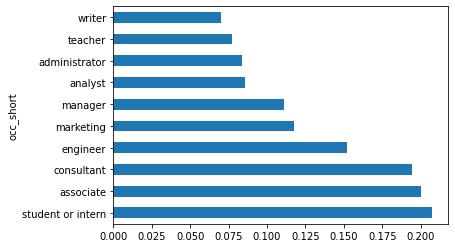

In [22]:
#Occupations with highest avo share. 
s=df.groupby('occ_short').size()>=30
dfcut=df.loc[df.occ_short.isin(s[s].index)]
dfcut.head()
dfcut.occ_short.value_counts(ascending=False).head(50)
dfcut.groupby(by="occ_short").avot.mean().sort_values(ascending=False).plot(kind='barh')


<AxesSubplot:ylabel='loc_short'>

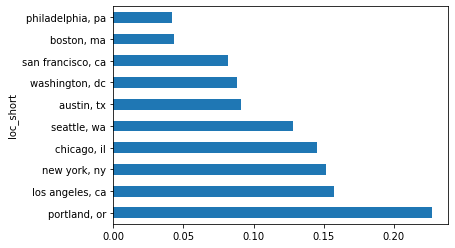

In [23]:
#Locations with highest avo share. 
s=df.groupby('loc_short').size()>=20
dfcut=df.loc[df.loc_short.isin(s[s].index)]
dfcut.head()
dfcut.loc_short.value_counts(ascending=False).head(20)
dfcut.groupby(by="loc_short").avot.mean().sort_values(ascending=False).plot(kind='barh')



/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/2674452987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal.salary=sal.salary.astype(int)
/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/2674452987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal['salaries_bygroup'] = pd.cut(sal.salary, [-1, 10000, 25000, 50000, 100000, 250000, 999000000], labels=sal_groups)


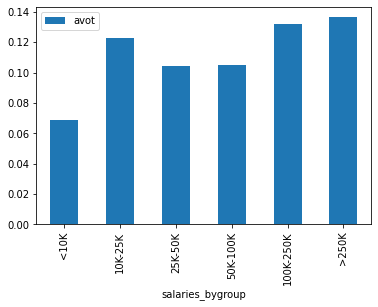

In [24]:
#AVOCADOS BY SALARY
sal=df.query("salary.isna()==False")
sal.head()
sal.salary=sal.salary.astype(int)
sal.salary.describe()

sal_groups = ["<10K", "10K-25K", "25K-50K", "50K-100K", "100K-250K", ">250K"]
sal['salaries_bygroup'] = pd.cut(sal.salary, [-1, 10000, 25000, 50000, 100000, 250000, 999000000], labels=sal_groups)

#Get means by salary groups
grouped = sal.groupby(by='salaries_bygroup', as_index=False).mean()

grouped.plot(kind='bar', x='salaries_bygroup', y='avot')
grouped.head()
grouped_export=grouped[['salaries_bygroup', 'avo', 'avot']]
grouped_export.to_csv("../FinalData/avo_bysalary.csv", index=False)


count       325.000000
mean      78284.421538
std      150013.666880
min           0.000000
25%           0.000000
50%        6600.000000
75%       71000.000000
max      907390.000000
Name: debt, dtype: float64


/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/2994019020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt.debt=debt.debt.astype(int)
/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/2994019020.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt['debt_bygroup'] = pd.cut(debt.debt, [-1, 1, 50000, 100000, 999000000], labels=debt_groups)


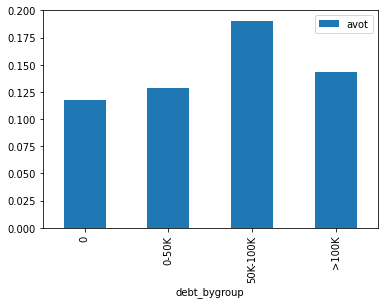

In [25]:
debt=df.query("debt.isna()==False")
debt.head()
debt.debt=debt.debt.astype(int)
print(debt.debt.describe())

debt_groups = ["0", "0-50K", "50K-100K", ">100K"]
debt['debt_bygroup'] = pd.cut(debt.debt, [-1, 1, 50000, 100000, 999000000], labels=debt_groups)

debt.query("debt>500000").head()

#Get means by debt groups
grouped = debt.groupby(by='debt_bygroup', as_index=False).mean()
grouped.plot(kind='bar', x='debt_bygroup', y='avot')

grouped_export=grouped[['debt_bygroup', 'avo', 'avot']]
grouped_export.to_csv("../FinalData/avo_bydebt.csv", index=False)


count       300.000000
mean        729.912116
std       10321.089963
min           0.000000
25%           0.000000
50%           0.116476
75%           1.281549
max      174367.000000
Name: debt_to_sal, dtype: float64


/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_95180/4165070220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt_to_sal['debt_to_sal_bygroup'] = pd.cut(debt_to_sal.debt_to_sal, [-1, 0.0001, 1, 2.5, 100000], labels=groups)


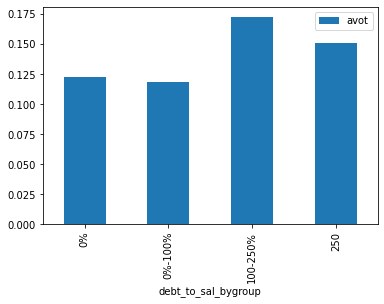

In [26]:
#debt to salary ratio
df['debt_to_sal']=df.debt/(df.salary+1)
print(df.debt_to_sal.describe())

debt_to_sal=df.query("debt_to_sal.isna()==False")
debt_to_sal.avot.sum()

groups = ["0%", "0%-100%", "100-250%", "250"]
debt_to_sal['debt_to_sal_bygroup'] = pd.cut(debt_to_sal.debt_to_sal, [-1, 0.0001, 1, 2.5, 100000], labels=groups)

#Get means by debt groups
grouped = debt_to_sal.groupby(by='debt_to_sal_bygroup', as_index=False).mean()
grouped.plot(kind='bar', x='debt_to_sal_bygroup', y='avot')

grouped_export=grouped[['debt_to_sal_bygroup', 'avo', 'avot']]
grouped_export.to_csv("../FinalData/avo_bydebttosal.csv", index=False)
